<a href="https://colab.research.google.com/github/mp308/DataProfile_Project/blob/main/Master_of_CleanDataHW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** 1.Set Up Spark and PySpark***


In [ ]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [861 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,219 kB]
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease


In [ ]:
# Set enviroment variable ให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
# ติดตั้ง PySpark ลงใน Python
!pip install pyspark==3.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 16.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880745 sha256=17f1aa97f25e521c1d823a68099b3d9b4d655c3a5a73129e8c5253463ce4b850
  Stored in directory: /root/.cache/pip/wheels/ef/70/50/7882e1bcb5693225f7cc86698f10953201b48b3f36317c2d18
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.228
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.45
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
# สร้าง Spark Session เพิ้อใช้งาน Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# ดูเวอร์ชั่น Python
import sys
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [ ]:
# ดูเวอร์ชั่น Spark
spark.version

'3.1.2'

***2.input Data***

In [ ]:
# Install Kaggle API
!pip install -q kaggle

# Make a directory for the Kaggle credentials and move the kaggle.json file there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d gauthamp10/google-playstore-apps

# Unzip the downloaded dataset
!unzip google-playstore-apps.zip -d ./google-playstore-apps

# List the contents of the directory to verify the extraction
!ls ./google-playstore-apps


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps
License(s): DbCL-1.0
 89% 185M/207M [00:02<00:00, 68.5MB/s]
100% 207M/207M [00:02<00:00, 79.8MB/s]
Archive:  google-playstore-apps.zip
  inflating: ./google-playstore-apps/Google-Playstore.csv  
Google-Playstore.csv


In [ ]:
!ls ./google-playstore-apps #recheck path data this stay

Google-Playstore.csv


***3.Read Data***

In [ ]:
dt = spark.read.csv('./google-playstore-apps/Google-Playstore.csv', header = True, inferSchema = True, ) #กำหนดค่า dt ให้pathของData

In [ ]:
dt

DataFrame[App Name: string, App Id: string, Category: string, Rating: string, Rating Count: string, Installs: string, Minimum Installs: string, Maximum Installs: string, Free: string, Price: string, Currency: string, Size: string, Minimum Android: string, Developer Id: string, Developer Website: string, Developer Email: string, Released: string, Last Updated: string, Content Rating: string, Privacy Policy: string, Ad Supported: string, In App Purchases: string, Editors Choice: string, Scraped Time: string]

***Check Data Rows and Columns***

In [ ]:
# นับจำนวนแถวและ column
print((dt.count(), len(dt.columns)))

(2312944, 24)


In [ ]:
# ดูข้อมูล
dt.show()

+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+------------+--------------+--------------------+------------+----------------+--------------+-------------------+
|                          App Name|              App Id|         Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs|Free|Price|Currency|Size|Minimum Android|        Developer Id|   Developer Website|     Developer Email|    Released|Last Updated|Content Rating|      Privacy Policy|Ad Supported|In App Purchases|Editors Choice|       Scraped Time|
+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+-----

In [ ]:
# ดูข้อมูล 100 แถวแรก
dt.show(100)

+------------------------------------+--------------------+-----------------+------+------------+-----------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+------------+--------------+--------------------+------------+----------------+--------------+-------------------+
|                            App Name|              App Id|         Category|Rating|Rating Count|   Installs|Minimum Installs|Maximum Installs|Free|Price|Currency|Size|Minimum Android|        Developer Id|   Developer Website|     Developer Email|    Released|Last Updated|Content Rating|      Privacy Policy|Ad Supported|In App Purchases|Editors Choice|       Scraped Time|
+------------------------------------+--------------------+-----------------+------+------------+-----------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+---

In [ ]:
# ดูประเภทข้อมูลแต่ละคอลัมน์
dt.dtypes

[('App Name', 'string'),
 ('App Id', 'string'),
 ('Category', 'string'),
 ('Rating', 'string'),
 ('Rating Count', 'string'),
 ('Installs', 'string'),
 ('Minimum Installs', 'string'),
 ('Maximum Installs', 'string'),
 ('Free', 'string'),
 ('Price', 'string'),
 ('Currency', 'string'),
 ('Size', 'string'),
 ('Minimum Android', 'string'),
 ('Developer Id', 'string'),
 ('Developer Website', 'string'),
 ('Developer Email', 'string'),
 ('Released', 'string'),
 ('Last Updated', 'string'),
 ('Content Rating', 'string'),
 ('Privacy Policy', 'string'),
 ('Ad Supported', 'string'),
 ('In App Purchases', 'string'),
 ('Editors Choice', 'string'),
 ('Scraped Time', 'string')]

***3. Clean Data***

In [ ]:
# อีกคำสั่งในการดูข้อมูลแต่ละคอลัมน์ (Schema)
dt.printSchema()

root
 |-- App Name: string (nullable = true)
 |-- App Id: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Rating Count: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Minimum Installs: string (nullable = true)
 |-- Maximum Installs: string (nullable = true)
 |-- Free: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Minimum Android: string (nullable = true)
 |-- Developer Id: string (nullable = true)
 |-- Developer Website: string (nullable = true)
 |-- Developer Email: string (nullable = true)
 |-- Released: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Privacy Policy: string (nullable = true)
 |-- Ad Supported: string (nullable = true)
 |-- In App Purchases: string (nullable = true)
 |-- Editors Choice: string (nullable = true)
 |-- Scra

ทำการตรวจสอบ Data Type ของ Column ทั้งหมด พบความผิดปกติดังนี้

 **Recheck the colum of Data**


---



 ('Category', 'string'),cc
 ('Rating', 'string'), //recheck data
 ('Rating Count', 'string'), //recheck data
 ('Installs', 'string'), //recheck data
 ('Minimum Installs', 'string'), //recheck data
 ('Maximum Installs', 'string'), //recheck data
 ('Free', 'string'),cc
 ('Price', 'string'), //recheck data
 ('Currency', 'string'), recheck xxx or usd
 ('Size', 'string'), cc
 ('Minimum Android', 'string'),cc
 ('Developer Id', 'string'),cc
 ('Developer Website', 'string'),cc
 ('Developer Email', 'string'),cc
 ('Released', 'string'),cc
 ('Last Updated', 'string'),cc
 ('Content Rating', 'string'),
 ('Privacy Policy', 'string'),cc
 ('Ad Supported', 'string'),cc
 ('In App Purchases', 'string'),cc
 ('Editors Choice', 'string'),cc
 ('Scraped Time', 'string')]cc


---

cc = datatype is correct ,
//coment = datatype not sure

อธิบาย ('Rating', 'string', ไม่ควรเป็น string)
 ('Rating Count', 'string',ไม่ควรเป็น string)
 ('Installs', 'string'), //recheck data
 ('Minimum Installs', 'string'), //recheck data
 ('Maximum Installs', 'string'), //recheck data
 ('Price', 'string', ไม่ควรเป็น string),
 ('Currency', 'string',), recheck xxx or usd

***-- spark sql tranfrom --***


***Test to watch data form sql qurery***

In [ ]:
# แปลงข้อมูลจาก Spark DataFrame ให้เป็น TempView ก่อน
dt.createOrReplaceTempView("data")
# เรียกดู data
dt_sql = spark.sql("SELECT * FROM data")
dt_sql.show()

+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+------------+--------------+--------------------+------------+----------------+--------------+-------------------+
|                          App Name|              App Id|         Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs|Free|Price|Currency|Size|Minimum Android|        Developer Id|   Developer Website|     Developer Email|    Released|Last Updated|Content Rating|      Privacy Policy|Ad Supported|In App Purchases|Editors Choice|       Scraped Time|
+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+-----

***Recheck Data null i all table***

In [ ]:
# from pyspark.sql.functions import col, count, when

# # Assume `dt` is your DataFrame
# print("Over All Missing Null Data")

# # Step 1: Get total number of rows
# total_rows = dt.count()

# # Step 2: Count missing values using DataFrame operations
# missing_values_dt = dt.select([
#     count(when(col(c).isNull(), c)).alias(c) for c in dt.columns
# ])

# # Show the result of missing values count
# missing_values_dt.show()

# # Step 3: Calculate non-null counts for each column
# non_null_counts = dt.select([
#     count(when(col(c).isNotNull(), c)).alias(c) for c in dt.columns
# ])

# # Collect non-null counts as a dictionary
# non_null_counts_dict = non_null_counts.collect()[0].asDict()

# # Step 4: Calculate missing values
# missing_values = {column: total_rows - non_null_counts_dict[column] for column in dt.columns}

# # Print missing values
# print("\nMissing Values for Each Column:")
# for column, missing_count in missing_values.items():
#     print(f"Missing {column}: {missing_count}")


In [ ]:
from pyspark.sql.functions import col, count, when
from pyspark.sql import SparkSession

# Initialize Spark session (if not already initialized)
spark = SparkSession.builder.appName("MissingValuesCheck").getOrCreate()

# Step 1: Get total number of rows
total_rows = dt.count()

# Step 2: Calculate missing values for each column
missing_values_expr = [count(when(col(c).isNull(), c)).alias(c) for c in dt.columns]
missing_values_df = dt.select(missing_values_expr)

# Collect missing values counts as a dictionary
missing_values_dict = missing_values_df.collect()[0].asDict()

# Convert the dictionary to a DataFrame for better display
missing_values_data = [(column, missing_values_dict[column]) for column in missing_values_dict]
missing_values_summary_df = spark.createDataFrame(missing_values_data, ["Column Name", "Missing Values"])

# Filter columns that have missing data
missing_columns = missing_values_summary_df.filter(col("Missing Values") > 0)

# Show the result
print("\nMissing Values for Columns with Missing Data:")
missing_columns.show()

# Optionally, if you want to see the summary in a specific format:
# You can convert the DataFrame to Pandas for custom formatting, if necessary.
import pandas as pd
missing_values_summary_pd = missing_values_summary_df.toPandas()

# Display in a tabular format using Pandas
print("\nMissing Values Summary:")
print(missing_values_summary_pd)



Missing Values for Columns with Missing Data:
+-----------------+--------------+
|      Column Name|Missing Values|
+-----------------+--------------+
|           Rating|         22883|
|     Rating Count|         22883|
|         Installs|           107|
| Minimum Installs|           107|
|         Currency|           135|
|             Size|           196|
|  Minimum Android|          6530|
|     Developer Id|            33|
|Developer Website|        760826|
|  Developer Email|            38|
|         Released|         71055|
|   Privacy Policy|        420947|
|     Ad Supported|             4|
| In App Purchases|             2|
+-----------------+--------------+


Missing Values Summary:
          Column Name  Missing Values
0            App Name               0
1              App Id               0
2            Category               0
3              Rating           22883
4        Rating Count           22883
5            Installs             107
6    Minimum Installs          

***Qurery Top 100 Rating***

In [ ]:
dt_sql_Top10Ratings = spark.sql("""
SELECT `App Name`, `Rating`, `Price`
FROM data
ORDER BY `Rating` DESC
""")

# Show the result
dt_sql_Top10Ratings.show(100)

+----------------------------------+--------------------+-----+
|                          App Name|              Rating|Price|
+----------------------------------+--------------------+-----+
|              "100 Cool ""KANJI...|net.jp.apps.hirot...|   10|
|  "반려동물 앱이 하나로 통합된 ...|     kr.manse.catdog| 2108|
|               "인생수업 (""좋은글|com.storyshare.wi...| 4106|
|               """Gom Day"" - Memo|   com.migom.gomharu|   15|
|              """Менщина"": новини|com.menshchyna.an...|  184|
|              "Cricket Alpha - ...|com.ksmps.cricket...|   15|
|              """ESTUDIO"" Árboles|com.heliconia.est...|   89|
|              "The song ""I am ...|  com.hamada.anal7l7| 3725|
|                 "a2z rk ""RK NEWS|      com.app.aziuyr|10159|
|                     Chris Brown "|com.andromo.dev80...|  864|
|              """Thoughts"" - Read|              Social| True|
|                      """BaJuBel""|            Shopping| True|
|              "לוח קומו - רכב, ...|            Shopping| T

In [ ]:
from pyspark.sql.functions import col

# Check for non-numeric values in Rating and Price
invalid_values = dt.filter(
    (col("Rating").rlike("^[0-9]*\\.?[0-9]+$") == False) |
    (col("Price").rlike("^[0-9]*\\.?[0-9]+$") == False)
)

# Select only the required columns
invalid_values_selected = invalid_values.select("App Name", "Rating", "Price")

# Show rows with invalid data
print("Rows with invalid Rating or Price values:")
invalid_values_selected.show(100)



Rows with invalid Rating or Price values:
+----------------------------------+--------------------+-------+
|                          App Name|              Rating|  Price|
+----------------------------------+--------------------+-------+
|              "Book, An ""Attic...|   Books & Reference|   True|
|                     Chris Brown "|com.andromo.dev80...|    864|
|              "100 Cool ""KANJI...|net.jp.apps.hirot...|     10|
|              """Тайны Микромир...|           Education|   True|
|               "인생수업 (""좋은글|com.storyshare.wi...|   4106|
|                      """BaJuBel""|            Shopping|   True|
|              """10jimt""Tanjim...|        Productivity|   True|
|                 "a2z rk ""RK NEWS|      com.app.aziuyr|  10159|
|                "Колыбельная ""Спи|         Educational|   True|
|              """Thoughts"" - Read|              Social|   True|
|              """Менщина"": новини|com.menshchyna.an...|    184|
|  "반려동물 앱이 하나로 통합된 ...|     kr.manse.cat

***ทำการตรวจสอบข้อมูลที่ไม่ควรเป็น String ว่ามีข้อมูลที่ผิดพลาดอย่างไร***

เมื่อพบจุดบกพร่องแล้วจึงตรวจสอบทีละคอลั่ม

***ReCheck Rating Colum***

In [ ]:
# SQL query to select the top 100 apps with the highest price
dt_sql_Top10Rating = spark.sql("""
SELECT `App Name`, `Rating`
FROM data
ORDER BY `Rating` DESC
LIMIT 100
""")

# Show the result
dt_sql_Top10Rating.show(30)

#เจอ Rating ที่มีเป็น String

+----------------------------------+--------------------+
|                          App Name|              Rating|
+----------------------------------+--------------------+
|              "100 Cool ""KANJI...|net.jp.apps.hirot...|
|  "반려동물 앱이 하나로 통합된 ...|     kr.manse.catdog|
|               "인생수업 (""좋은글|com.storyshare.wi...|
|               """Gom Day"" - Memo|   com.migom.gomharu|
|              """Менщина"": новини|com.menshchyna.an...|
|              "Cricket Alpha - ...|com.ksmps.cricket...|
|              """ESTUDIO"" Árboles|com.heliconia.est...|
|              "The song ""I am ...|  com.hamada.anal7l7|
|                 "a2z rk ""RK NEWS|      com.app.aziuyr|
|                     Chris Brown "|com.andromo.dev80...|
|              """Thoughts"" - Read|              Social|
|                      """BaJuBel""|            Shopping|
|              "לוח קומו - רכב, ...|            Shopping|
|                       """Baguette|              Racing|
|              "আমার ছড়া বই : Po.

In [ ]:
# SQL query to check for rows where 'Rating' contains any alphabetic characters
dt_check_NonNumericRating = spark.sql("""
SELECT `App Name`, `Rating`
FROM data
WHERE `Rating` RLIKE '[a-zA-Z]'
""")

# Show the result
print("Rows with alphabetic characters in Rating:")
dt_check_NonNumericRating.show(100)

# Count the number of rows with alphabetic characters in Rating
count_non_numeric_rating = dt_check_NonNumericRating.count()
print(f"\nCount of rows with alphabetic characters in Rating: {count_non_numeric_rating}")


Rows with alphabetic characters in Rating:
+----------------------------------+--------------------+
|                          App Name|              Rating|
+----------------------------------+--------------------+
|              "Book, An ""Attic...|   Books & Reference|
|                     Chris Brown "|com.andromo.dev80...|
|              "100 Cool ""KANJI...|net.jp.apps.hirot...|
|              """Тайны Микромир...|           Education|
|               "인생수업 (""좋은글|com.storyshare.wi...|
|                      """BaJuBel""|            Shopping|
|              """10jimt""Tanjim...|        Productivity|
|                 "a2z rk ""RK NEWS|      com.app.aziuyr|
|                "Колыбельная ""Спи|         Educational|
|              """Thoughts"" - Read|              Social|
|              """Менщина"": новини|com.menshchyna.an...|
|  "반려동물 앱이 하나로 통합된 ...|     kr.manse.catdog|
|              """ESTUDIO"" Árboles|com.heliconia.est...|
|"한글공부,낱말카드(어린이한글킹...|           Education|
|   

***ReCheck Rating Count Colum***

In [ ]:
# SQL query to select the top 100 apps with the highest price
dt_sql_Top10Rating = spark.sql("""
SELECT `App Name`, `Rating Count`
FROM data
ORDER BY `Rating Count` DESC
LIMIT 100
""")

# Show the result
dt_sql_Top10Rating.show(30)

#เจอ Rating ที่มีเป็น String

+--------------------------------+--------------------+
|                        App Name|        Rating Count|
+--------------------------------+--------------------+
|            "Yanosik: ""anti-...|pl.neptis.yanosik...|
|             """Gom Day"" - Memo|               Tools|
|"반려동물 앱이 하나로 통합된 ...|            Shopping|
|               "a2z rk ""RK NEWS|    News & Magazines|
|            """Менщина"": новини|    News & Magazines|
|                   Chris Brown "|       Music & Audio|
|            "The song ""I am ...|       Entertainment|
|            "100 Cool ""KANJI...|       Entertainment|
|            "Cricket Alpha - ...|       Entertainment|
|             "인생수업 (""좋은글|           Education|
|            """ESTUDIO"" Árboles|           Education|
|                Bob The Robber 3|               99995|
|            Couchsurfing Trav...|               99994|
|            Bear Simulator 3D...|                9999|
|                 Camera illusion|                9999|
|          

In [ ]:
# SQL query to check for rows where 'Rating Count' contains any alphabetic characters
dt_check_NonNumericRatingCount = spark.sql("""
SELECT `App Name`, `Rating Count`
FROM data
WHERE `Rating Count` RLIKE '[a-zA-Z]'
""")

# Show the result
print("Rows with alphabetic characters in Rating Count:")
dt_check_NonNumericRatingCount.show(100)

# Count the number of rows with alphabetic characters in Rating Count
count_non_numeric_rating_count = dt_check_NonNumericRatingCount.count()
print(f"\nCount of rows with alphabetic characters in Rating Count: {count_non_numeric_rating_count}")


Rows with alphabetic characters in Rating Count:
+--------------------------------+--------------------+
|                        App Name|        Rating Count|
+--------------------------------+--------------------+
|                   Chris Brown "|       Music & Audio|
|            "100 Cool ""KANJI...|       Entertainment|
|             "인생수업 (""좋은글|           Education|
|               "a2z rk ""RK NEWS|    News & Magazines|
|            """Менщина"": новини|    News & Magazines|
|"반려동물 앱이 하나로 통합된 ...|            Shopping|
|            """ESTUDIO"" Árboles|           Education|
|            "Cricket Alpha - ...|       Entertainment|
|             """Gom Day"" - Memo|               Tools|
|            "Yanosik: ""anti-...|pl.neptis.yanosik...|
|            "The song ""I am ...|       Entertainment|
+--------------------------------+--------------------+


Count of rows with alphabetic characters in Rating Count: 11


***ReCheck Prices Colum***

In [ ]:
# SQL query to select the top 100 apps with the highest price
df_sql_Top10Price = spark.sql("""
SELECT `App Name`, `Price`
FROM data
ORDER BY `Price` DESC
LIMIT 100
""")

# Show the result
df_sql_Top10Price.show(30)

#เจอ app ที่มีราคาเป็น Ture/False

+----------------------------------+-----+
|                          App Name|Price|
+----------------------------------+-----+
|              "D&R Autoworks, "...| True|
|              "К.Н. Батюшковъ. ...| True|
|              "Bilge Yatırımcı ...| True|
|              "Board game ""Par...| True|
|              """Thoughts"" - Read| True|
|                     "בית לחם ת""א| True|
|                      """BaJuBel""| True|
|              """Тайны Микромир...| True|
|              """10jimt""Tanjim...| True|
|              "לוח קומו - רכב, ...| True|
|              "HDI BHARAT NEWS ...| True|
|                             """HA| True|
|                "Колыбельная ""Спи| True|
|"한글공부,낱말카드(어린이한글킹...| True|
|              "Book, An ""Attic...| True|
|              "আমার ছড়া বই : Po...| True|
|                       """Baguette| True|
|              """Сложный выбор"...| True|
|               "Виджеты для ""Окей|False|
|                     Acting Agency|99.99|
|              Engineerin

In [ ]:
# SQL query to check for rows where 'Price' is not a number
df_check_NonNumericPrices = spark.sql("""
SELECT `App Name`, `Price`
FROM data
WHERE `Price` NOT RLIKE '^[0-9]+(\\.[0-9]+)?$'
""")

# Show the result
print("Rows with non-numeric Price values:")
df_check_NonNumericPrices.show(100)

# Count the number of rows with non-numeric prices
count_non_numeric_prices = df_check_NonNumericPrices.count()
print(f"\nCount of rows with non-numeric Price values: {count_non_numeric_prices}")


Rows with non-numeric Price values:
+----------------------------------+-----+
|                          App Name|Price|
+----------------------------------+-----+
|              "Book, An ""Attic...| True|
|              """Тайны Микромир...| True|
|                      """BaJuBel""| True|
|              """10jimt""Tanjim...| True|
|                "Колыбельная ""Спи| True|
|              """Thoughts"" - Read| True|
|"한글공부,낱말카드(어린이한글킹...| True|
|              "আমার ছড়া বই : Po...| True|
|              "לוח קומו - רכב, ...| True|
|               "Виджеты для ""Окей|False|
|                     "בית לחם ת""א| True|
|                       """Baguette| True|
|              "D&R Autoworks, "...| True|
|              """Сложный выбор"...| True|
|              "HDI BHARAT NEWS ...| True|
|              "Board game ""Par...| True|
|              "Bilge Yatırımcı ...| True|
|                             """HA| True|
|              "К.Н. Батюшковъ. ...| True|
+-------------------------------

***Spark Sql Query of Maximum Installs***

In [ ]:
# SQL query to select the top 10 apps by 'Maximum Installs'
dt_sql_Top10Installs = spark.sql("""
SELECT `App Name`, `Maximum Installs`
FROM data
ORDER BY `Maximum Installs` DESC
""")
dt_sql_Top10Installs.show(20)


+----------------------------+----------------+
|                    App Name|Maximum Installs|
+----------------------------+----------------+
|                        SIJÚ|           99996|
|            Meaningful Dream|           99995|
|드로잉 다이어리: 1일 1드로잉|           99994|
|                   심플피온4|           99993|
|        OXOO - ฟรีทีวี & ...|            9999|
|        Naye Mosam ki Sah...|            9999|
|                統一發票對獎|            9999|
|                  MIT Mobile|           99988|
|        Ultimate MotoCross 2|         9998625|
|        house of gigs: A ...|           99985|
|                     ALinPro|            9998|
|              Bounce shooter|            9998|
|        Creative Photo Co...|            9998|
|              Radio Paradiso|            9998|
|                    iGET FIT|            9998|
|        VIRTUAL RINGELMAN...|            9998|
|         VR Flight Simulator|           99978|
|        Merge Animal King...|          999779|
|        Funn

In [ ]:
# SQL query to select the top 10 apps with the lowest 'Maximum Installs'
dt_sql_Lowest10Installs = spark.sql("""
SELECT `App Name`, `Maximum Installs`
FROM data
ORDER BY `Maximum Installs` ASC
""")

# Show the result
dt_sql_Lowest10Installs.show(20)


+--------------------+----------------+
|            App Name|Maximum Installs|
+--------------------+----------------+
|         Ball Ascend|               0|
|    SmartFortuneTest|               0|
|        Stickerbrand|               0|
|Retirement Saving...|               0|
|   FSM Collect Nepal|               0|
|Classic Brick-Lei...|               0|
|        NY Education|               0|
|St Patricks Raque...|               0|
|       Material Girl|               0|
|Mystery Old Time ...|               0|
|Sociology Quiz Pr...|               0|
|         Space Virus|               0|
|          WishyWashy|               0|
|             rooster|               0|
|      anthropomantic|               0|
|           My Hairsy|               0|
|How To Become a D...|               0|
|           Planduler|               0|
|        Pam's Crafts|               0|
|coffee cup wallpa...|               0|
+--------------------+----------------+
only showing top 20 rows



In [ ]:
# SQL query to check for rows where 'Maximum Installs' contains any non-numeric characters
df_check_NonNumericMaxInstalls = spark.sql("""
SELECT `App Name`, `Maximum Installs`
FROM data
WHERE `Maximum Installs` RLIKE '[^0-9]'
""")

# Show the result
print("Rows with non-numeric characters in Maximum Installs:")
df_check_NonNumericMaxInstalls.show(100)

# Count the number of rows with non-numeric characters in Maximum Installs
count_non_numeric_max_installs = df_check_NonNumericMaxInstalls.count()
print(f"\nCount of rows with non-numeric characters in Maximum Installs: {count_non_numeric_max_installs}")


Rows with non-numeric characters in Maximum Installs:
+--------------------------------+----------------+
|                        App Name|Maximum Installs|
+--------------------------------+----------------+
|                   Chris Brown "|            500+|
|            "100 Cool ""KANJI...|             10+|
|             "인생수업 (""좋은글|          1,000+|
|               "a2z rk ""RK NEWS|         10,000+|
|            """Менщина"": новини|            100+|
|"반려동물 앱이 하나로 통합된 ...|          1,000+|
|            """ESTUDIO"" Árboles|             50+|
|            "Cricket Alpha - ...|             10+|
|             """Gom Day"" - Memo|             10+|
|            "The song ""I am ...|          1,000+|
+--------------------------------+----------------+


Count of rows with non-numeric characters in Maximum Installs: 10


***Spark Sql Query of Minimum Installs***

In [ ]:
# SQL query to select the top 10 apps by 'Maximum Installs'
dt_sql_Top10Installs = spark.sql("""
SELECT `App Name`, `Minimum Installs`
FROM data
ORDER BY `Minimum Installs` DESC
""")
dt_sql_Top10Installs.show(30)

+--------------------+----------------+
|            App Name|Minimum Installs|
+--------------------+----------------+
|"""Менщина"": новини|               6|
|       Chris Brown "|               6|
|Google Text-to-Sp...|      5000000000|
|Google Maps - Nav...|      5000000000|
|            Hangouts|      5000000000|
|Android Accessibi...|      5000000000|
|        Google Drive|      5000000000|
|              Google|      5000000000|
|       Google Photos|      5000000000|
|Google Chrome: Fa...|      5000000000|
|            Facebook|      5000000000|
|Messenger – Text ...|      5000000000|
|             YouTube|      5000000000|
|Google TV (previo...|      5000000000|
|  WhatsApp Messenger|      5000000000|
|               Gmail|      5000000000|
|PicsArt Photo Edi...|       500000000|
|         Phone Clone|       500000000|
|           Pinterest|       500000000|
|      My Talking Tom|       500000000|
|Garena Free Fire ...|       500000000|
|          Calculator|       500000000|


In [ ]:
# SQL query to select the top 100 rows based on 'Maximum Installs' in ascending order
dt_sql_MinInstallRows = spark.sql("""
SELECT `App Name`, `Minimum Installs`
FROM data
ORDER BY `Minimum Installs` ASC
""")
dt_sql_MinInstallRows.show(100)


+------------------------------------+----------------+
|                            App Name|Minimum Installs|
+------------------------------------+----------------+
|                           Gıybettin|            null|
|                Phantasy:Three Ki...|            null|
|                         Mitrasphere|            null|
|                Dresscode - Fashi...|            null|
|                         Modern Dead|            null|
|                Food Country - Co...|            null|
|                 Local 24h Motorista|            null|
|                Midsomer Murders:...|            null|
|                       Trex vs Human|            null|
|                  Idle Royal Stories|            null|
|                Real City: Truck ...|            null|
|                Julius Brown and ...|            null|
|                The Witcher Tales...|            null|
|                Robocar Poli: Bui...|            null|
|                Warlords: Turn Ba...|          

In [ ]:
# SQL query to check for rows where 'Minimum Installs' contains any non-numeric characters
df_check_NonNumericMinInstalls = spark.sql("""
SELECT `App Name`, `Minimum Installs`
FROM data
WHERE `Minimum Installs`  RLIKE '[^0-9]'
""")

# Show the result
print("Rows with non-numeric characters in Minimum Installs:")
df_check_NonNumericMinInstalls.show(100)

# Count the number of rows with non-numeric characters in Minimum Installs
count_non_numeric_min_installs = df_check_NonNumericMinInstalls.count()
print(f"\nCount of rows with non-numeric characters in Minimum Installs: {count_non_numeric_min_installs}")


Rows with non-numeric characters in Minimum Installs:
+----------------------------------+----------------+
|                          App Name|Minimum Installs|
+----------------------------------+----------------+
|              "Book, An ""Attic...|              0+|
|              """Тайны Микромир...|         10,000+|
|                      """BaJuBel""|             10+|
|              """10jimt""Tanjim...|          1,000+|
|                "Колыбельная ""Спи|         50,000+|
|              """Thoughts"" - Read|             50+|
|"한글공부,낱말카드(어린이한글킹...|        100,000+|
|              "আমার ছড়া বই : Po...|            500+|
|              "לוח קומו - רכב, ...|        100,000+|
|               "Виджеты для ""Окей|          1,000+|
|                     "בית לחם ת""א|          1,000+|
|                       """Baguette|            500+|
|              "D&R Autoworks, "...|            100+|
|              """Сложный выбор"...|          5,000+|
|              "HDI BHARAT NEWS ...|      

***Spark Sql Query of Installs***

In [ ]:
# SQL query to check for rows where 'Installs' contains any non-numeric characters
df_check_NonNumericInstalls = spark.sql("""
SELECT `App Name`, `Installs`
FROM data
WHERE `Installs` not RLIKE '[^0-9]'
""")

# Show the result
print("Rows with non-numeric characters in Installs:")
df_check_NonNumericInstalls.show(100)

# Count the number of rows with non-numeric characters in Installs
count_non_numeric_installs = df_check_NonNumericInstalls.count()
print(f"\nCount of rows with non-numeric characters in Installs: {count_non_numeric_installs}")


Rows with non-numeric characters in Installs:
+----------------------------------+--------+
|                          App Name|Installs|
+----------------------------------+--------+
|              "Book, An ""Attic...|       0|
|              """Тайны Микромир...|      56|
|                      """BaJuBel""|       0|
|              """10jimt""Tanjim...|      34|
|                "Колыбельная ""Спи|     458|
|              """Thoughts"" - Read|       0|
|"한글공부,낱말카드(어린이한글킹...|     294|
|              "আমার ছড়া বই : Po...|       7|
|              "לוח קומו - רכב, ...|    1963|
|               "Виджеты для ""Окей|     142|
|                     "בית לחם ת""א|       0|
|                       """Baguette|      50|
|              "D&R Autoworks, "...|       0|
|              """Сложный выбор"...|      64|
|              "HDI BHARAT NEWS ...|      22|
|              "Board game ""Par...|      77|
|              "Bilge Yatırımcı ...|      10|
|                             """HA|       0|
| 

In [ ]:
# SQL query to check for rows where 'Installs' contains any non-numeric characters
df_check_NonNumericInstalls = spark.sql("""
SELECT `App Name`, `Installs`
FROM data
WHERE `Installs` RLIKE '[^0-9]'
""")

# Show the result
print("Rows with non-numeric characters in Installs:")
df_check_NonNumericInstalls.show(100)

# Count the number of rows with non-numeric characters in Installs
count_non_numeric_installs = df_check_NonNumericInstalls.count()
print(f"\nCount of rows with non-numeric characters in Installs: {count_non_numeric_installs}")


Rows with non-numeric characters in Installs:
+------------------------------------+-----------+
|                            App Name|   Installs|
+------------------------------------+-----------+
|                             Gakondo|        10+|
|                 Ampere Battery Info|     5,000+|
|                              Vibook|        50+|
|                Smart City Trichy...|        10+|
|                             GROW.me|       100+|
|                              IMOCCI|        50+|
|                unlimited 4G data...|     1,000+|
|                The Everyday Cale...|       500+|
|                           WhatsOpen|        10+|
|                Neon 3d Iron Tech...|    50,000+|
|                     Dodge The Cars!|       100+|
|                             Parents|       100+|
|  桃園機場捷運時刻表 - 捷運轉乘路...|    10,000+|
|                        be.MOBILISED|       100+|
|                   Caliway Conductor|    10,000+|
|                Readymade Grocery...|     1,000+|

***Spark Sql Query of Currency***

In [ ]:
# SQL query to count occurrences of each unique value in the Currency column
df_currency_counts = spark.sql("""
SELECT `Currency`, COUNT(*) AS count
FROM data
GROUP BY `Currency`
ORDER BY count DESC
""")

# Show the result
df_currency_counts.show()


+--------+-------+
|Currency|  count|
+--------+-------+
|     USD|2311518|
|     XXX|   1236|
|    null|    135|
|       0|     18|
|    True|     10|
|     EUR|      6|
|     INR|      5|
|     GBP|      3|
|     CAD|      2|
|     RUB|      1|
|     BRL|      1|
|     TRY|      1|
|     ZAR|      1|
|     PKR|      1|
|     AUD|      1|
|    1.99|      1|
| 9126997|      1|
|     VND|      1|
|     SGD|      1|
|     KRW|      1|
+--------+-------+



In [ ]:
# For 'XXX'
df_currency_XXX = spark.sql("""
SELECT `Currency`, `Price`
FROM data
WHERE `Currency` = 'XXX'
""")
print("Data for Currency = 'XXX':")
df_currency_XXX.show(10)

# For null
df_currency_null = spark.sql("""
SELECT `Currency`, `Price`
FROM data
WHERE `Currency` IS NULL
""")
print("Data for Currency IS NULL:")
df_currency_null.show(10)

# For '0'
df_currency_0 = spark.sql("""
SELECT `Currency`, `Price`
FROM data
WHERE `Currency` = '0'
""")
print("Data for Currency = '0':")
df_currency_0.show(10)

# For 'True'
df_currency_true = spark.sql("""
SELECT `Currency`, `Price`
FROM data
WHERE `Currency` = 'True'
""")
print("Data for Currency = 'True':")
df_currency_true.show(10)

# For '9126997'
df_currency_9126997 = spark.sql("""
SELECT `Currency`, `Price`
FROM data
WHERE `Currency` = '9126997'
""")
print("Data for Currency = '9126997':")
df_currency_9126997.show(10)

# For '1.99'
df_currency_199 = spark.sql("""
SELECT `Currency`, `Price`
FROM data
WHERE `Currency` = '1.99'
""")
print("Data for Currency = '1.99':")
df_currency_199.show(10)


Data for Currency = 'XXX':
+--------+-----+
|Currency|Price|
+--------+-----+
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
|     XXX|    0|
+--------+-----+
only showing top 10 rows

Data for Currency IS NULL:
+--------+-----+
|Currency|Price|
+--------+-----+
|    null|    0|
|    null|    0|
|    null|    0|
|    null|    0|
|    null|    0|
|    null|    0|
|    null|    0|
|    null|    0|
|    null|    0|
|    null|    0|
+--------+-----+
only showing top 10 rows

Data for Currency = '0':
+--------+-----+
|Currency|Price|
+--------+-----+
|       0| True|
|       0| True|
|       0| True|
|       0| True|
|       0| True|
|       0| True|
|       0| True|
|       0| True|
|       0| True|
|       0| True|
+--------+-----+
only showing top 10 rows

Data for Currency = 'True':
+--------+-----+
|Currency|Price|
+--------+-----+
|    True|  864|
|    True|   10|
|    True| 4106|

***Colum Prices , Rating , Rating Count , Installs , Minimum Installs , Maximum Installs , Price , Currency  Have error Data // TO DO FIX***

***4. Clean Data To Do All Solution***

***Rating***

In [ ]:
from pyspark.sql.functions import col

# Correct SQL query to update 'Rating' and select available columns
dt_sql_ratingresult = spark.sql("""
SELECT `App Name`,
       `App Id`,
       `Category`,
       CASE
           WHEN `Rating` RLIKE '[a-zA-Z]' THEN NULL
           ELSE `Rating`
       END AS `Rating`
FROM data
""")

# Show a sample of the updated data to verify the update
print("Sample of updated data:")
dt_sql_ratingresult.show(5)

# Check if there are any rows where Rating is still not NULL
print("Rows with non-numeric characters in Rating:")
dt_sql_ratingresult.filter(col("Rating").rlike('[a-zA-Z]')).show()

# Alternatively, to find rows with NULL Rating
print("Rows with NULL Rating:")
dt_sql_ratingresult.filter(col("Rating").isNull()).show()

# Count the number of rows with NULL Rating
count_null_rating = dt_sql_ratingresult.filter(col("Rating").isNull()).count()
print(f"Count of rows with NULL Rating: {count_null_rating}")

# Count the number of rows with non-numeric characters in Rating
count_non_numeric_rating = dt_sql_ratingresult.filter(col("Rating").rlike('[a-zA-Z]')).count()
print(f"Count of rows with non-numeric characters in Rating: {count_non_numeric_rating}")

# เปลี่ยนประเภทข้อมูลของคอลัมน์ `Rating` เป็น `double`
dt_sql_ratingresult = dt_sql_ratingresult.withColumn("Rating", col("Rating").cast("double"))

# แสดงตัวอย่างข้อมูลที่ถูกเปลี่ยนประเภทข้อมูลแล้ว
print("Sample of updated data with 'Rating' as double:")
dt_sql_ratingresult.show(5)

# ตรวจสอบประเภทข้อมูลของคอลัมน์ `Rating`
dt_sql_ratingresult.printSchema()




Sample of updated data:
+--------------------+--------------------+-------------+------+
|            App Name|              App Id|     Category|Rating|
+--------------------+--------------------+-------------+------+
|             Gakondo| com.ishakwe.gakondo|    Adventure|   0.0|
| Ampere Battery Info|com.webserveis.ba...|        Tools|   4.4|
|              Vibook|com.doantiepvien.crm| Productivity|   0.0|
|Smart City Trichy...|cst.stJoseph.ug17...|Communication|   5.0|
|             GROW.me|com.horodyski.grower|        Tools|   0.0|
+--------------------+--------------------+-------------+------+
only showing top 5 rows

Rows with non-numeric characters in Rating:
+--------+------+--------+------+
|App Name|App Id|Category|Rating|
+--------+------+--------+------+
+--------+------+--------+------+

Rows with NULL Rating:
+--------------------+--------------------+----------------+------+
|            App Name|              App Id|        Category|Rating|
+--------------------+----

***Rating Count***

In [ ]:
#Rating Count
from pyspark.sql.functions import col, when

# Load your data into DataFrame (replace with actual data loading)
# dt = spark.read.csv("path_to_your_data.csv", header=True, inferSchema=True)

# Register the DataFrame as a temporary SQL table
dt.createOrReplaceTempView("data")

# SQL query to select the top 100 apps with the highest Rating Count
df_sql_Top100RatingCount = spark.sql("""
SELECT `App Name`, `Rating Count`
FROM data
ORDER BY `Rating Count` DESC
LIMIT 100
""")

# Show the result
print("Top 100 Apps with the Highest Rating Count:")
df_sql_Top100RatingCount.show(30)

# Update rows where 'Rating Count' contains non-numeric characters to NULL
df_updated_rating_count = df_sql_Top100RatingCount.withColumn(
    "Rating Count",
    when(col("Rating Count").rlike("[^0-9]"), None).otherwise(col("Rating Count"))
)

# Show the updated data to verify the change
print("Updated Data with Non-Numeric 'Rating Count' Set to NULL:")
df_updated_rating_count.show(30)

# Count the number of NULL values in the 'Rating Count' column
count_null_rating_count = df_updated_rating_count.filter(col("Rating Count").isNull()).count()
print(f"Count of NULL values in 'Rating Count': {count_null_rating_count}")

# Check if there are any rows where Rating Count is still not NULL
count_non_numeric_rating_count = df_updated_rating_count.filter(col("Rating Count").rlike("[^0-9]")).count()
print(f"Count of rows with non-numeric characters in 'Rating Count': {count_non_numeric_rating_count}")

# เปลี่ยนประเภทข้อมูลของคอลัมน์ `Rating Count` เป็น `int`
df_updated_rating_count = df_updated_rating_count.withColumn("Rating Count", col("Rating Count").cast("int"))

# แสดงตัวอย่างข้อมูลที่ถูกเปลี่ยนประเภทข้อมูลแล้ว
print("Sample of updated data with 'Rating Count' as int:")
df_updated_rating_count.show(5)

# ตรวจสอบประเภทข้อมูลของคอลัมน์ `Rating Count`
df_updated_rating_count.printSchema()





Top 100 Apps with the Highest Rating Count:
+--------------------------------+--------------------+
|                        App Name|        Rating Count|
+--------------------------------+--------------------+
|            "Yanosik: ""anti-...|pl.neptis.yanosik...|
|             """Gom Day"" - Memo|               Tools|
|"반려동물 앱이 하나로 통합된 ...|            Shopping|
|               "a2z rk ""RK NEWS|    News & Magazines|
|            """Менщина"": новини|    News & Magazines|
|                   Chris Brown "|       Music & Audio|
|            "The song ""I am ...|       Entertainment|
|            "100 Cool ""KANJI...|       Entertainment|
|            "Cricket Alpha - ...|       Entertainment|
|             "인생수업 (""좋은글|           Education|
|            """ESTUDIO"" Árboles|           Education|
|                Bob The Robber 3|               99995|
|            Couchsurfing Trav...|               99994|
|            Bear Simulator 3D...|                9999|
|                 Camer

***Price***

In [ ]:
from pyspark.sql.functions import col, when

# SQL query to check for rows where 'Price' is not a number
df_check_NonNumericPrices = spark.sql("""
SELECT `App Name`, `Price`
FROM data
WHERE `Price` NOT RLIKE '^[0-9]+(\\.[0-9]+)?$'
""")

# Show the result
print("Rows with non-numeric Price values:")
df_check_NonNumericPrices.show(100)

# Count the number of rows with non-numeric prices
count_non_numeric_prices = df_check_NonNumericPrices.count()
print(f"\nCount of rows with non-numeric Price values: {count_non_numeric_prices}")

# Update 'Price' column to set non-numeric values to 0
df_updated_prices = df_check_NonNumericPrices.withColumn(
    "Price",
    when(col("Price").rlike('^[0-9]+(\\.[0-9]+)?$'), col("Price"))
    .otherwise("0")
)

# Show the updated data to verify the change
print("Updated Data with Non-Numeric Prices Set to 0:")
df_updated_prices.show(100)

# Count the number of updated rows
count_updated_prices = df_updated_prices.filter(col("Price") == "0").count()
print(f"Count of rows with Price set to 0: {count_updated_prices}")

# เปลี่ยนประเภทข้อมูลของคอลัมน์ `Price` เป็น `float`
df_updated_prices = df_updated_prices.withColumn("Price", col("Price").cast("float"))

# แสดงตัวอย่างข้อมูลที่ถูกเปลี่ยนประเภทข้อมูลแล้ว
print("Sample of updated data with 'Price' as float:")
df_updated_prices.show(5)

# ตรวจสอบประเภทข้อมูลของคอลัมน์ `Price`
df_updated_prices.printSchema()




Rows with non-numeric Price values:
+----------------------------------+-----+
|                          App Name|Price|
+----------------------------------+-----+
|              "Book, An ""Attic...| True|
|              """Тайны Микромир...| True|
|                      """BaJuBel""| True|
|              """10jimt""Tanjim...| True|
|                "Колыбельная ""Спи| True|
|              """Thoughts"" - Read| True|
|"한글공부,낱말카드(어린이한글킹...| True|
|              "আমার ছড়া বই : Po...| True|
|              "לוח קומו - רכב, ...| True|
|               "Виджеты для ""Окей|False|
|                     "בית לחם ת""א| True|
|                       """Baguette| True|
|              "D&R Autoworks, "...| True|
|              """Сложный выбор"...| True|
|              "HDI BHARAT NEWS ...| True|
|              "Board game ""Par...| True|
|              "Bilge Yatırımcı ...| True|
|                             """HA| True|
|              "К.Н. Батюшковъ. ...| True|
+-------------------------------

***Minimum Installs***

In [ ]:
from pyspark.sql.functions import col, regexp_replace, when, floor

# Step 1: Clean 'Minimum Installs' by removing the '+' sign and any other non-numeric characters
spark.sql("""
CREATE OR REPLACE TEMP VIEW cleaned_data_min_installs AS
SELECT `App Name`,
       CASE
           WHEN `Minimum Installs` RLIKE '[0-9]+' THEN
               REGEXP_REPLACE(`Minimum Installs`, '[+,]', '')
           ELSE NULL
       END AS `Minimum Installs`
FROM data
""")

# Step 2: Convert to integer and handle floating-point numbers correctly
spark.sql("""
CREATE OR REPLACE TEMP VIEW final_cleaned_data_min_installs AS
SELECT `App Name`,
       CASE
           WHEN `Minimum Installs` IS NULL THEN 0
           ELSE CAST(FLOOR(CAST(`Minimum Installs` AS DOUBLE)) AS INT)
       END AS `Minimum Installs`
FROM cleaned_data_min_installs
""")

# Show the updated data to verify the change
print("Updated Data with Cleaned Minimum Installs:")
df_clean_min_installs = spark.sql("SELECT * FROM final_cleaned_data_min_installs")
df_clean_min_installs.show(10)

# SQL query to check if there are any rows with non-numeric characters after cleaning
df_check_NonNumericMinInstalls = spark.sql("""
SELECT `App Name`, `Minimum Installs`
FROM final_cleaned_data_min_installs
WHERE `Minimum Installs` RLIKE '[^0-9]'
""")

# Show rows with non-numeric characters in Minimum Installs
print("Rows with non-numeric characters in Minimum Installs:")
df_check_NonNumericMinInstalls.show(10)

# SQL query to check if there are any rows with NULL values
df_check_NullMinInstalls = spark.sql("""
SELECT `App Name`, `Minimum Installs`
FROM final_cleaned_data_min_installs
WHERE `Minimum Installs` IS NULL
""")

# Show rows with NULL values in Minimum Installs
print("Rows with NULL Minimum Installs:")
df_check_NullMinInstalls.show(10)

# เปลี่ยนประเภทข้อมูลของคอลัมน์ `Minimum Installs` เป็น `int`
df_clean_min_installs = df_clean_min_installs.withColumn("Minimum Installs", col("Minimum Installs").cast("int"))

# แสดงตัวอย่างข้อมูลที่ถูกเปลี่ยนประเภทข้อมูลแล้ว
print("Sample of updated data with 'Minimum Installs' as int:")
df_clean_min_installs.show(5)

# ตรวจสอบประเภทข้อมูลของคอลัมน์ `Minimum Installs`
df_clean_min_installs.printSchema()




Updated Data with Cleaned Minimum Installs:
+--------------------+----------------+
|            App Name|Minimum Installs|
+--------------------+----------------+
|             Gakondo|              10|
| Ampere Battery Info|            5000|
|              Vibook|              50|
|Smart City Trichy...|              10|
|             GROW.me|             100|
|              IMOCCI|              50|
|unlimited 4G data...|            1000|
|The Everyday Cale...|             500|
|           WhatsOpen|              10|
|Neon 3d Iron Tech...|           50000|
+--------------------+----------------+
only showing top 10 rows

Rows with non-numeric characters in Minimum Installs:
+--------+----------------+
|App Name|Minimum Installs|
+--------+----------------+
+--------+----------------+

Rows with NULL Minimum Installs:
+--------+----------------+
|App Name|Minimum Installs|
+--------+----------------+
+--------+----------------+

Sample of updated data with 'Minimum Installs' as int:
+-

***Maximum Installs***

In [ ]:
from pyspark.sql.functions import col, regexp_replace, when, floor

# Step 1: Clean 'Maximum Installs' by removing the '+' sign and any other non-numeric characters
spark.sql("""
CREATE OR REPLACE TEMP VIEW cleaned_data_max_installs AS
SELECT `App Name`,
       CASE
           WHEN `Maximum Installs` RLIKE '[0-9]+' THEN
               REGEXP_REPLACE(`Maximum Installs`, '[+,-,]', '')
           ELSE NULL
       END AS `Maximum Installs`
FROM data
""")

# Step 2: Convert to integer and handle floating-point numbers correctly
spark.sql("""
CREATE OR REPLACE TEMP VIEW final_cleaned_data_max_installs AS
SELECT `App Name`,
       CASE
           WHEN `Maximum Installs` IS NULL THEN 0
           ELSE CAST(FLOOR(CAST(`Maximum Installs` AS DOUBLE)) AS INT)
       END AS `Maximum Installs`
FROM cleaned_data_max_installs
""")

# Show the updated data to verify the change
print("Updated Data with Cleaned Maximum Installs:")
df_clean_max_installs = spark.sql("SELECT * FROM final_cleaned_data_max_installs")
df_clean_max_installs.show(10)
#test
# SQL query to check if there are any rows with non-numeric characters after cleaning
df_check_NonNumericMaxInstalls = spark.sql("""
SELECT `App Name`, `Maximum Installs`
FROM final_cleaned_data_max_installs
WHERE `Maximum Installs` RLIKE '[^0-9]'
""")

# Show rows with non-numeric characters in Maximum Installs
print("Rows with non-numeric characters in Maximum Installs:")
df_check_NonNumericMaxInstalls.show(10)

# SQL query to check if there are any rows with NULL values
df_check_NullMaxInstalls = spark.sql("""
SELECT `App Name`, `Maximum Installs`
FROM final_cleaned_data_max_installs
WHERE `Maximum Installs` IS NULL
""")

# Show rows with NULL values in Maximum Installs
print("Rows with NULL Maximum Installs:")
df_check_NullMaxInstalls.show(10)

# เปลี่ยนประเภทข้อมูลของคอลัมน์ `Maximum Installs` เป็น `int`
df_clean_max_installs = df_clean_max_installs.withColumn("Maximum Installs", col("Maximum Installs").cast("int"))

# แสดงตัวอย่างข้อมูลที่ถูกเปลี่ยนประเภทข้อมูลแล้ว
print("Sample of updated data with 'Maximum Installs' as int:")
df_clean_max_installs.show(5)

# ตรวจสอบประเภทข้อมูลของคอลัมน์ `Maximum Installs`
df_clean_max_installs.printSchema()




Updated Data with Cleaned Maximum Installs:
+--------------------+----------------+
|            App Name|Maximum Installs|
+--------------------+----------------+
|             Gakondo|              15|
| Ampere Battery Info|            7662|
|              Vibook|              58|
|Smart City Trichy...|              19|
|             GROW.me|             478|
|              IMOCCI|              89|
|unlimited 4G data...|            2567|
|The Everyday Cale...|             702|
|           WhatsOpen|              18|
|Neon 3d Iron Tech...|           62433|
+--------------------+----------------+
only showing top 10 rows

Rows with non-numeric characters in Maximum Installs:
+--------------------+----------------+
|            App Name|Maximum Installs|
+--------------------+----------------+
|     Google Calendar|     -1643246334|
|           Instagram|      -735096019|
|Google Play Books...|     -1092290565|
|        Google Drive|     -1561669333|
|            Currents|      -3652511

In [ ]:
# SQL query to select the specific row with the 'App Name' "D&R Autoworks, " and 'Maximum Installs' containing "100+"
df_specific_row = spark.sql("""
SELECT `App Name`, `Maximum Installs`
FROM cleaned_data_max_installs
WHERE `App Name` rlike "한글공부,낱"
""")

# Show the result
print("Specific Row Before Update:")
df_specific_row.show()

#ดึงมา 1 ตัวแปรว่าเปลี่ยนแล้วหรือยัง

Specific Row Before Update:
+----------------------------------+----------------+
|                          App Name|Maximum Installs|
+----------------------------------+----------------+
|"한글공부,낱말카드(어린이한글킹...|          100000|
|한글대통령-어린이한글,한글공부,...|          146168|
+----------------------------------+----------------+



In [ ]:
# SQL query to select the specific row with the 'App Name' "D&R Autoworks, " and 'Maximum Installs' containing "100+"
df_specific_row = spark.sql("""
SELECT `App Name`, `Maximum Installs`
FROM cleaned_data_max_installs
WHERE `App Name` rlike "Samsung Push Service"
""")

# Show the result
print("Specific Row Before Update:")
df_specific_row.show()

#ดึงมา 1 ตัวแปรว่าเปลี่ยนแล้วหรือยัง

Specific Row Before Update:
+--------------------+----------------+
|            App Name|Maximum Installs|
+--------------------+----------------+
|Samsung Push Service|      4186667750|
+--------------------+----------------+



***Installs***

In [ ]:
from pyspark.sql.functions import col, regexp_replace, when, floor

# Step 1: Clean 'Installs' by removing non-numeric characters, such as '+', ',', etc.
spark.sql("""
CREATE OR REPLACE TEMP VIEW cleaned_data_installs AS
SELECT `App Name`,
       CASE
           WHEN `Installs` RLIKE '[0-9]+' THEN
               REGEXP_REPLACE(`Installs`, '[^0-9]', '')  -- Remove everything except digits
           ELSE NULL
       END AS `Installs`
FROM data
""")

# Step 2: Convert to integer and handle floating-point numbers correctly
spark.sql("""
CREATE OR REPLACE TEMP VIEW final_cleaned_data_installs AS
SELECT `App Name`,
       CASE
           WHEN `Installs` IS NULL THEN 0
           ELSE CAST(FLOOR(CAST(`Installs` AS DOUBLE)) AS INT)  -- Convert to integer, rounding down if necessary
       END AS `Installs`
FROM cleaned_data_installs
""")

# Show the updated data to verify the change
print("Updated Data with Cleaned Installs:")
df_clean_installs = spark.sql("SELECT * FROM final_cleaned_data_installs")
df_clean_installs.show(10)

# SQL query to check if there are any rows where non-numeric characters are still present
df_check_NonNumericInstalls = spark.sql("""
SELECT `App Name`, `Installs`
FROM cleaned_data_installs
WHERE `Installs` RLIKE '[^0-9]'
""")

# Show rows with non-numeric characters in Installs
print("Rows with non-numeric characters in Installs:")
df_check_NonNumericInstalls.show(10)

# SQL query to check if there are any rows with NULL values
df_check_NullInstalls = spark.sql("""
SELECT `App Name`, `Installs`
FROM final_cleaned_data_installs
WHERE `Installs` IS NULL
""")

# Show rows with NULL values in Installs
print("Rows with NULL Installs:")
df_check_NullInstalls.show(10)

# เปลี่ยนประเภทข้อมูลของคอลัมน์ `Installs` เป็น `int`
df_clean_installs = df_clean_installs.withColumn("Installs", col("Installs").cast("int"))

# แสดงตัวอย่างข้อมูลที่ถูกเปลี่ยนประเภทข้อมูลแล้ว
print("Sample of updated data with 'Installs' as int:")
df_clean_installs.show(5)

# ตรวจสอบประเภทข้อมูลของคอลัมน์ `Installs`
df_clean_installs.printSchema()





Updated Data with Cleaned Installs:
+--------------------+--------+
|            App Name|Installs|
+--------------------+--------+
|             Gakondo|      10|
| Ampere Battery Info|    5000|
|              Vibook|      50|
|Smart City Trichy...|      10|
|             GROW.me|     100|
|              IMOCCI|      50|
|unlimited 4G data...|    1000|
|The Everyday Cale...|     500|
|           WhatsOpen|      10|
|Neon 3d Iron Tech...|   50000|
+--------------------+--------+
only showing top 10 rows

Rows with non-numeric characters in Installs:
+--------+--------+
|App Name|Installs|
+--------+--------+
+--------+--------+

Rows with NULL Installs:
+--------+--------+
|App Name|Installs|
+--------+--------+
+--------+--------+

Sample of updated data with 'Installs' as int:
+--------------------+--------+
|            App Name|Installs|
+--------------------+--------+
|             Gakondo|      10|
| Ampere Battery Info|    5000|
|              Vibook|      50|
|Smart City Trichy

***Currency***

In [ ]:
from pyspark.sql.functions import col, regexp_replace, when

# Create a temporary view with the cleaned 'Currency' column
spark.sql("""
CREATE OR REPLACE TEMP VIEW cleaned_data_currency AS
SELECT `App Name`,
       CASE
           WHEN `Currency` IN ('XXX', '0', '9126997', '1.99', 'True') OR `Currency` IS NULL THEN 'Google Play'
           ELSE `Currency`
       END AS `Currency`
FROM data
""")

# Show the updated data to verify the change
print("Updated Data with 'Google Play' replacements:")
df_clean_currency = spark.sql("SELECT * FROM cleaned_data_currency")
df_clean_currency.show(10)

# Check the distribution of the 'Currency' column to ensure the replacements
df_currency_distribution = spark.sql("""
SELECT `Currency`, COUNT(*) AS count
FROM cleaned_data_currency
GROUP BY `Currency`
ORDER BY count DESC
""")

print("Currency Distribution after Replacement:")
df_currency_distribution.show()



Updated Data with 'Google Play' replacements:
+--------------------+--------+
|            App Name|Currency|
+--------------------+--------+
|             Gakondo|     USD|
| Ampere Battery Info|     USD|
|              Vibook|     USD|
|Smart City Trichy...|     USD|
|             GROW.me|     USD|
|              IMOCCI|     USD|
|unlimited 4G data...|     USD|
|The Everyday Cale...|     USD|
|           WhatsOpen|     USD|
|Neon 3d Iron Tech...|     USD|
+--------------------+--------+
only showing top 10 rows

Currency Distribution after Replacement:
+-----------+-------+
|   Currency|  count|
+-----------+-------+
|        USD|2311518|
|Google Play|   1401|
|        EUR|      6|
|        INR|      5|
|        GBP|      3|
|        CAD|      2|
|        RUB|      1|
|        TRY|      1|
|        BRL|      1|
|        ZAR|      1|
|        KRW|      1|
|        PKR|      1|
|        AUD|      1|
|        VND|      1|
|        SGD|      1|
+-----------+-------+



In [ ]:
# Group by the 'Category' column and count the occurrences, then order by the count in descending order
category_counts = dt.groupBy("Category").count().orderBy("count", ascending=False)

# Show the results
category_counts.show(99999)


+-----------------------+------+
|               Category| count|
+-----------------------+------+
|              Education|241086|
|          Music & Audio|154905|
|                  Tools|143987|
|               Business|143770|
|          Entertainment|138271|
|              Lifestyle|118331|
|      Books & Reference|116726|
|        Personalization| 89210|
|       Health & Fitness| 83510|
|           Productivity| 79695|
|               Shopping| 75253|
|           Food & Drink| 73926|
|         Travel & Local| 67288|
|                Finance| 65465|
|                 Arcade| 53792|
|                 Puzzle| 51168|
|                 Casual| 50813|
|          Communication| 48167|
|                 Sports| 47483|
|                 Social| 44733|
|       News & Magazines| 42804|
|            Photography| 35552|
|                Medical| 32065|
|                 Action| 27555|
|      Maps & Navigation| 26721|
|             Simulation| 23282|
|              Adventure| 23203|
|         

***5. Export Data***

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, regexp_replace, floor, lit

# Initialize SparkSession
spark = SparkSession.builder.appName("DataCleaning").getOrCreate()

try:
   # Step 1: Load your DataFrame
    dt_clean = spark.sql("""
    SELECT `App Name`,
           `App Id`,
           `Category`,
           `Rating`,
           `Rating Count`,
           `Price`,
           `Minimum Installs`,
           `Maximum Installs`,
           `Installs`,
           `Currency`
    FROM data
    """)

    # เอา data เยอะเกินเอาม่ทุกคอลั่มไม่ได้

    # Step 2: Clean 'Rating' column
    dt_clean = dt_clean.withColumn("Rating",
        when(col("Rating").rlike('[a-zA-Z]'), None).otherwise(col("Rating")).cast("double")
    )

    # Step 3: Clean 'Rating Count' column
    dt_clean = dt_clean.withColumn(
        "Rating Count",
        when(col("Rating Count").rlike("[^0-9]"), None).otherwise(col("Rating Count").cast("int"))
    )

    # Step 4: Clean 'Price' column
    dt_clean = dt_clean.withColumn(
        "Price",
        when(col("Price").rlike('^[0-9]+(\\.[0-9]+)?$'), col("Price")).otherwise("0").cast("float")
    )

    # Step 5: Clean 'Minimum Installs' column
    dt_clean = dt_clean.withColumn(
        "Minimum Installs",
        when(col("Minimum Installs").rlike('[0-9]+'), regexp_replace(col("Minimum Installs"), '[+,]', '')).otherwise(None).cast("double")
    ).withColumn("Minimum Installs", floor(col("Minimum Installs")).cast("int"))

    # Step 6: Clean 'Maximum Installs' column
    dt_clean = dt_clean.withColumn(
        "Maximum Installs",
        when(col("Maximum Installs").rlike('[0-9]+'), regexp_replace(col("Maximum Installs"), '[+,-]', '')).otherwise(None).cast("double")
    ).withColumn("Maximum Installs", floor(col("Maximum Installs")).cast("int"))

    # Step 7: Clean 'Installs' column
    dt_clean = dt_clean.withColumn(
        "Installs",
        when(col("Installs").rlike('[0-9]+'), regexp_replace(col("Installs"), '[^0-9]', '')).otherwise(None).cast("double")
    ).withColumn("Installs", floor(col("Installs")).cast("int"))

    # Step 8: Clean 'Currency' column
    dt_clean = dt_clean.withColumn(
        "Currency",
        when(col("Currency").isin('XXX', '0', '9126997', '1.99', 'True') | col("Currency").isNull(), 'Google Play').otherwise(col("Currency"))
    )

    # Step 9: Replace categories with fewer than 2 occurrences with null
    category_counts = dt_clean.groupBy("Category").count()
    categories_to_replace = category_counts.filter(col("count") < 2).select("Category").rdd.flatMap(lambda x: x).collect()

    dt_clean = dt_clean.withColumn(
        "Category",
        when(col("Category").isin(categories_to_replace), None).otherwise(col("Category"))
    )

    # Optional: Show a sample of the cleaned data to verify the result
    print("Sample of cleaned data:")
    dt_clean.show(5)

    # Optional: Print the schema to verify the data type changes
    dt_clean.printSchema()

    # Save the cleaned DataFrame as a single CSV file
    dt_clean.coalesce(1).write.csv('Cleaned_Data_Single.csv', header=True)

except Exception as e:
    print(f"An error occurred: {e}")


Sample of cleaned data:
+--------------------+--------------------+-------------+------+------------+-----+----------------+----------------+--------+--------+
|            App Name|              App Id|     Category|Rating|Rating Count|Price|Minimum Installs|Maximum Installs|Installs|Currency|
+--------------------+--------------------+-------------+------+------------+-----+----------------+----------------+--------+--------+
|             Gakondo| com.ishakwe.gakondo|    Adventure|   0.0|           0|  0.0|              10|              15|      10|     USD|
| Ampere Battery Info|com.webserveis.ba...|        Tools|   4.4|          64|  0.0|            5000|            7662|    5000|     USD|
|              Vibook|com.doantiepvien.crm| Productivity|   0.0|           0|  0.0|              50|              58|      50|     USD|
|Smart City Trichy...|cst.stJoseph.ug17...|Communication|   5.0|           5|  0.0|              10|              19|      10|     USD|
|             GROW.me|co

In [ ]:
all_parts = spark.read.csv('/content/Cleaned_Data_Single.csv/part-*.csv', header = True, inferSchema = True)

In [ ]:
# นับจำนวนแถวและ column
print((all_parts.count(), len(all_parts.columns)))


(2312944, 10)


In [ ]:
all_parts.printSchema()

root
 |-- App Name: string (nullable = true)
 |-- App Id: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Rating Count: integer (nullable = true)
 |-- Price: double (nullable = true)
 |-- Minimum Installs: integer (nullable = true)
 |-- Maximum Installs: integer (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Currency: string (nullable = true)



In [ ]:
all_parts.show(10)

+--------------------+--------------------+----------------+------+------------+-----+----------------+----------------+--------+--------+
|            App Name|              App Id|        Category|Rating|Rating Count|Price|Minimum Installs|Maximum Installs|Installs|Currency|
+--------------------+--------------------+----------------+------+------------+-----+----------------+----------------+--------+--------+
|             Gakondo| com.ishakwe.gakondo|       Adventure|   0.0|           0|  0.0|              10|              15|      10|     USD|
| Ampere Battery Info|com.webserveis.ba...|           Tools|   4.4|          64|  0.0|            5000|            7662|    5000|     USD|
|              Vibook|com.doantiepvien.crm|    Productivity|   0.0|           0|  0.0|              50|              58|      50|     USD|
|Smart City Trichy...|cst.stJoseph.ug17...|   Communication|   5.0|           5|  0.0|              10|              19|      10|     USD|
|             GROW.me|com.h

In [ ]:
# Show top 10 prices of apps
top_10_Price = all_parts.orderBy(col("Price").desc()).select("App Name", "Price").limit(100)
top_10_Price.show(10)

+--------------------------------+---------+
|                        App Name|    Price|
+--------------------------------+---------+
|            "Yanosik: ""anti-...|5000000.0|
|               "a2z rk ""RK NEWS|  10159.0|
|             "인생수업 (""좋은글|   4106.0|
|            "The song ""I am ...|   3725.0|
|"반려동물 앱이 하나로 통합된 ...|   2108.0|
|                   Chris Brown "|    864.0|
|                    MESH Connect|    400.0|
|                        TEST EGY|   399.99|
|                           Taxes|   399.99|
|            Accounting Provid...|   399.99|
+--------------------------------+---------+
only showing top 10 rows



In [ ]:
# Show top 10 prices of apps
top_10_Maximum_Installs = all_parts.orderBy(col("Maximum Installs").desc()).select("App Name", "Maximum Installs").limit(100)

top_10_Minimum_Installs = all_parts.orderBy(col("Minimum Installs").desc()).select("App Name", "Minimum Installs").limit(100)

# Display the result
top_10_Maximum_Installs.show(10)

top_10_Minimum_Installs.show(10)

+--------------------+----------------+
|            App Name|Maximum Installs|
+--------------------+----------------+
|     Samsung Gallery|      2123105347|
|       Facebook Lite|      2072296494|
|    Samsung My Files|      2063336389|
|  Microsoft OneDrive|      2056017889|
|        Android Auto|      1976625745|
|  WhatsApp Messenger|      1970670455|
|            Messages|      1931517750|
|Google TV (previo...|      1861551619|
|    Carrier Services|      1793502218|
|Skype - free IM &...|      1769991234|
+--------------------+----------------+
only showing top 10 rows

+--------------------+----------------+
|            App Name|Minimum Installs|
+--------------------+----------------+
|Google Play services|      1410065408|
|       Samsung Email|      1000000000|
|             Netflix|      1000000000|
|     Samsung Gallery|      1000000000|
|              TikTok|      1000000000|
|Dropbox: Cloud St...|      1000000000|
|      Samsung Health|      1000000000|
|     Google C

***6. Analysis Data***

<ipython-input-55-05e3188b00cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=all_parts_pd, order=all_parts_pd['Category'].value_counts().index, palette='viridis')


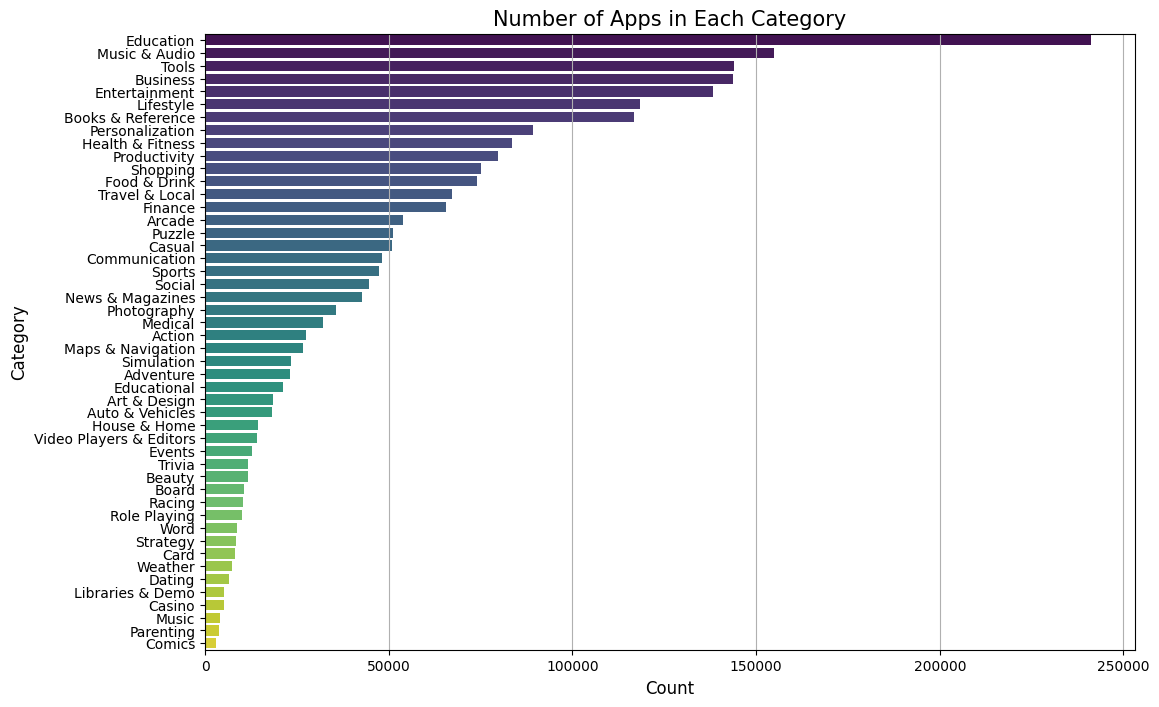

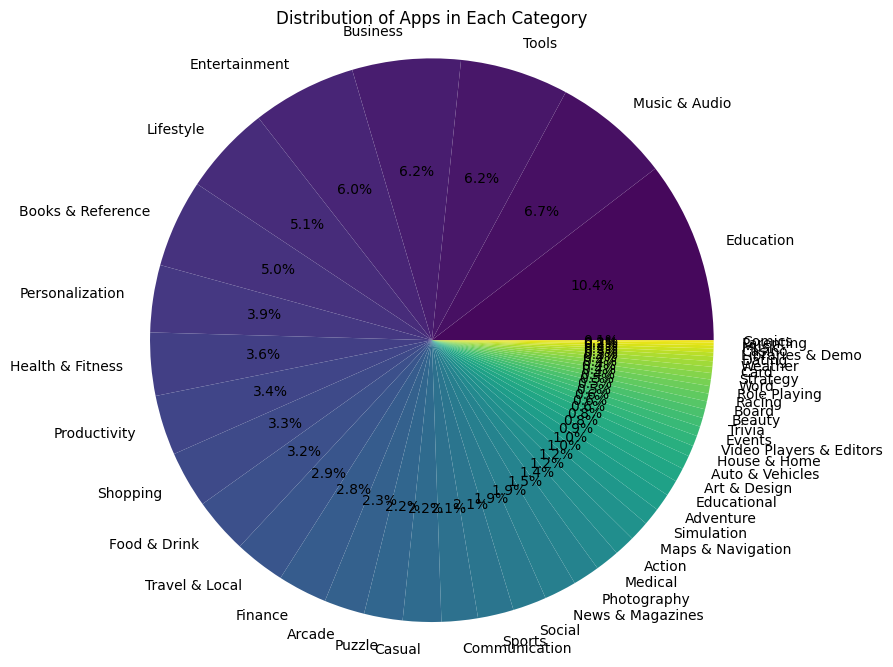

<ipython-input-55-05e3188b00cd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price', y='Category', data=all_parts_pd, palette='coolwarm')


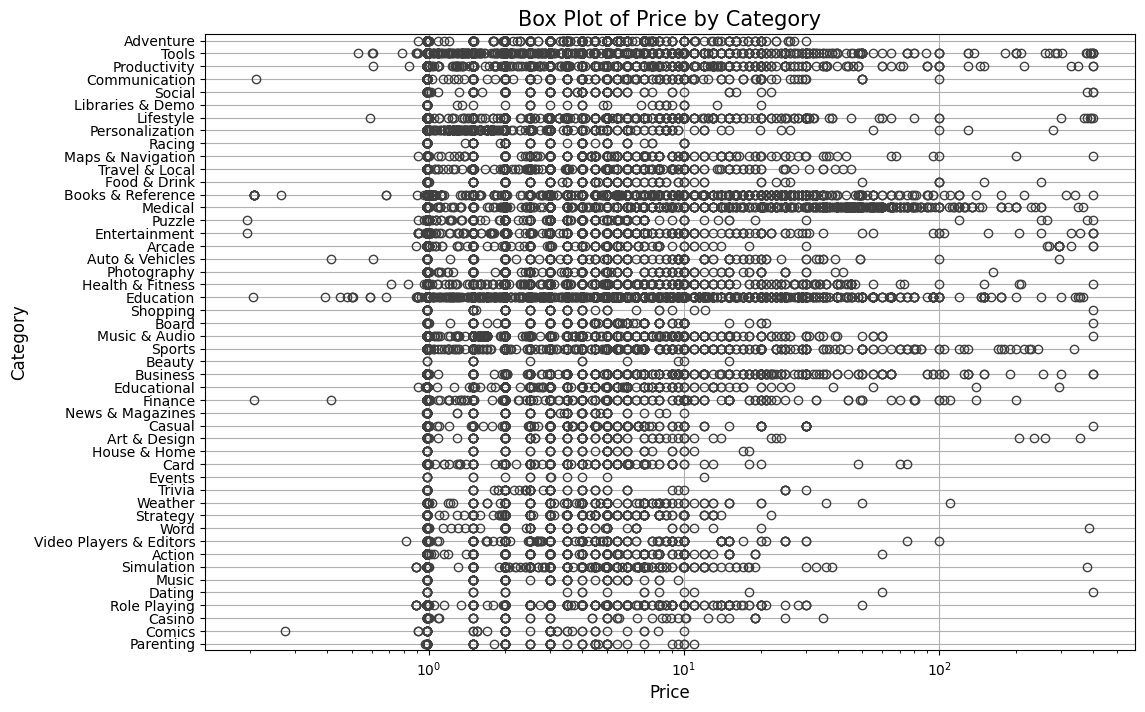

<ipython-input-55-05e3188b00cd>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='App Name', x='Maximum Installs', data=top_apps, palette='viridis')


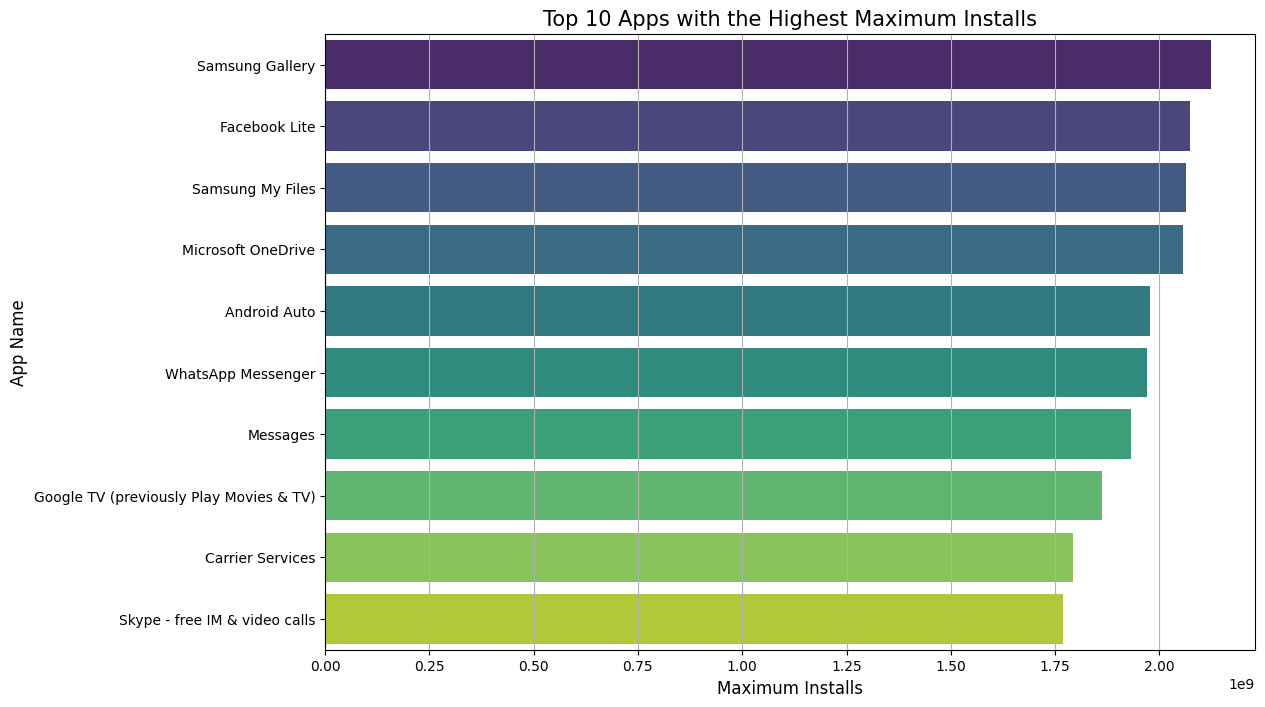

<ipython-input-55-05e3188b00cd>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating.index, x=avg_rating.values, palette='coolwarm')


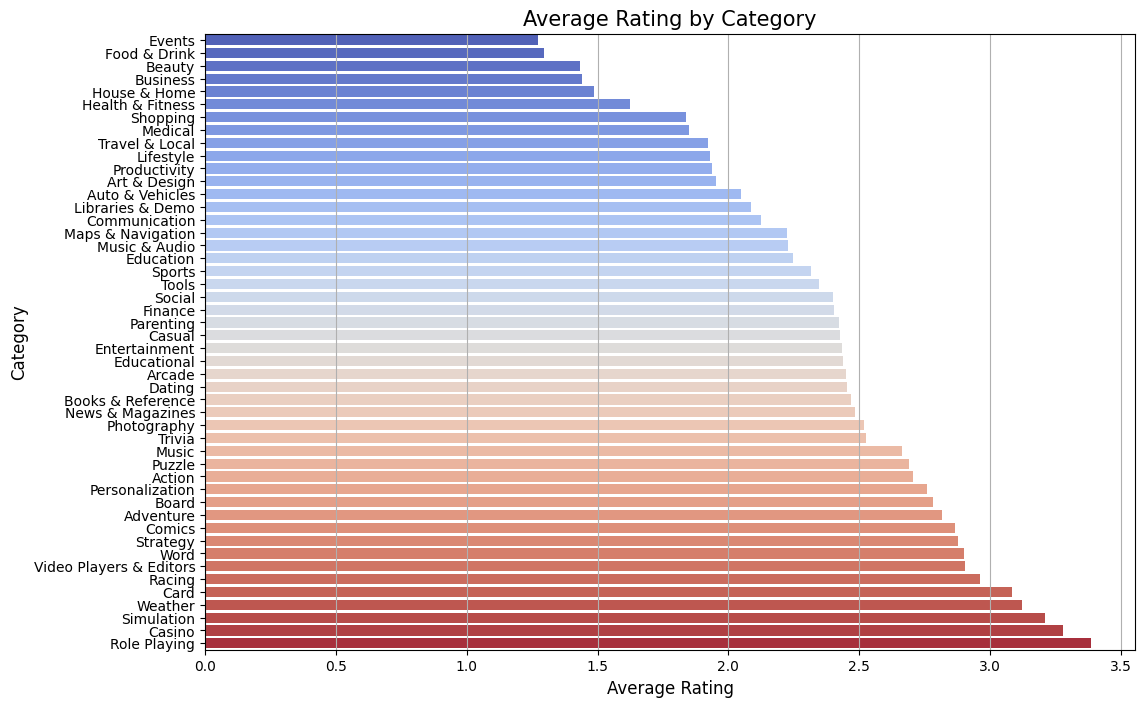

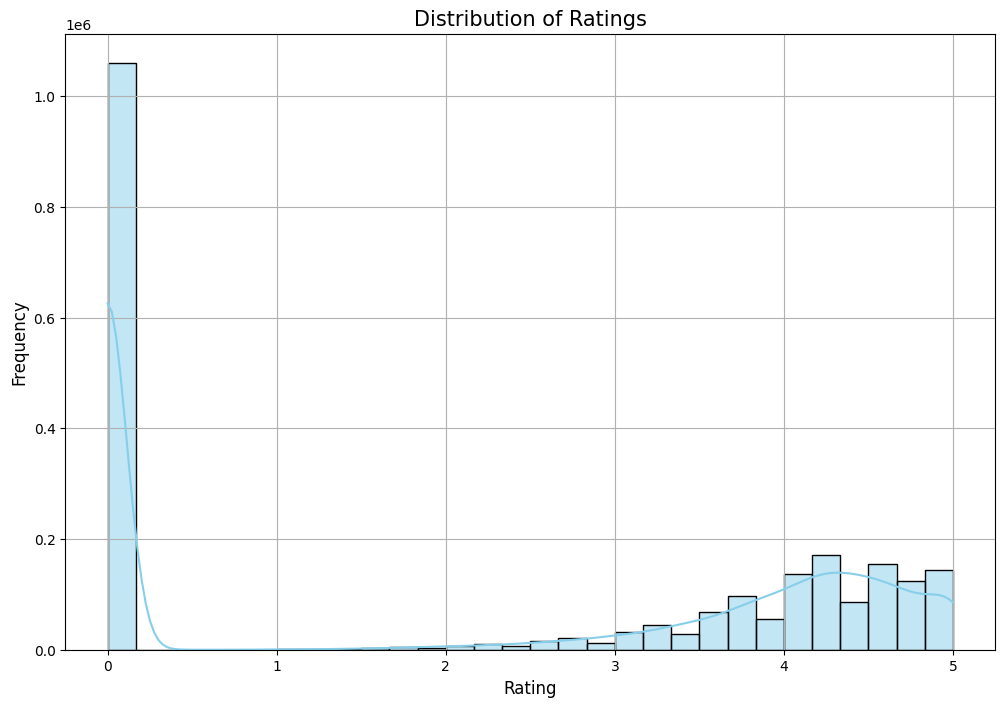

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If you successfully converted Spark DataFrame to Pandas DataFrame
all_parts_pd = all_parts.toPandas()  # Ensure to use the cleaned DataFrame

# 1. Number of Apps in Each Category
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=all_parts_pd, order=all_parts_pd['Category'].value_counts().index, palette='viridis')
plt.title('Number of Apps in Each Category', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(True, axis='x')
plt.show()

# 2. Distribution of Apps in Each Category (Pie Chart)
plt.figure(figsize=(8, 8))
category_counts = all_parts_pd['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Distribution of Apps in Each Category', fontsize=12)
plt.axis('equal')
plt.show()

# 3. Box Plot of Price by Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Price', y='Category', data=all_parts_pd, palette='coolwarm')
plt.title('Box Plot of Price by Category', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xscale('log')
plt.grid(True)
plt.show()

# 4. Top 10 Apps with the Highest Maximum Installs
top_apps = all_parts_pd.nlargest(10, 'Maximum Installs')[['App Name', 'Maximum Installs']]
plt.figure(figsize=(12, 8))
sns.barplot(y='App Name', x='Maximum Installs', data=top_apps, palette='viridis')
plt.title('Top 10 Apps with the Highest Maximum Installs', fontsize=15)
plt.xlabel('Maximum Installs', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.grid(True, axis='x')
plt.show()

# 5. Average Rating by Category
plt.figure(figsize=(12, 8))
avg_rating = all_parts_pd.groupby('Category')['Rating'].mean().sort_values()
sns.barplot(y=avg_rating.index, x=avg_rating.values, palette='coolwarm')
plt.title('Average Rating by Category', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(True, axis='x')
plt.show()

# Additional Visualizations

# 6. Distribution of Ratings
plt.figure(figsize=(12, 8))
sns.histplot(all_parts_pd['Rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


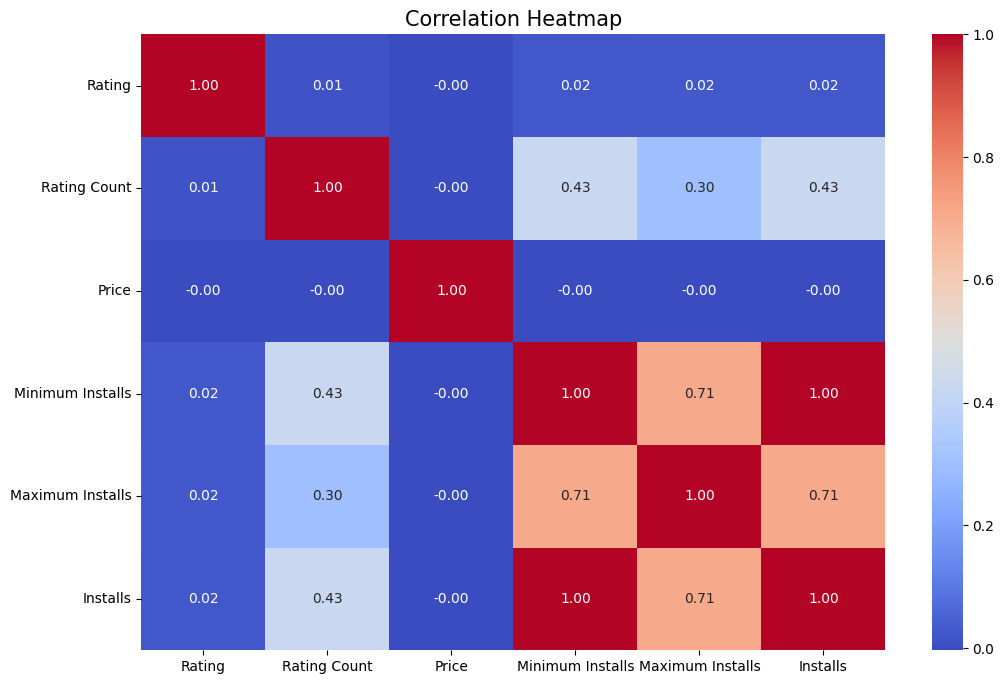

<ipython-input-56-cb7d5d438f39>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price.index, x=avg_price.values, palette='coolwarm')


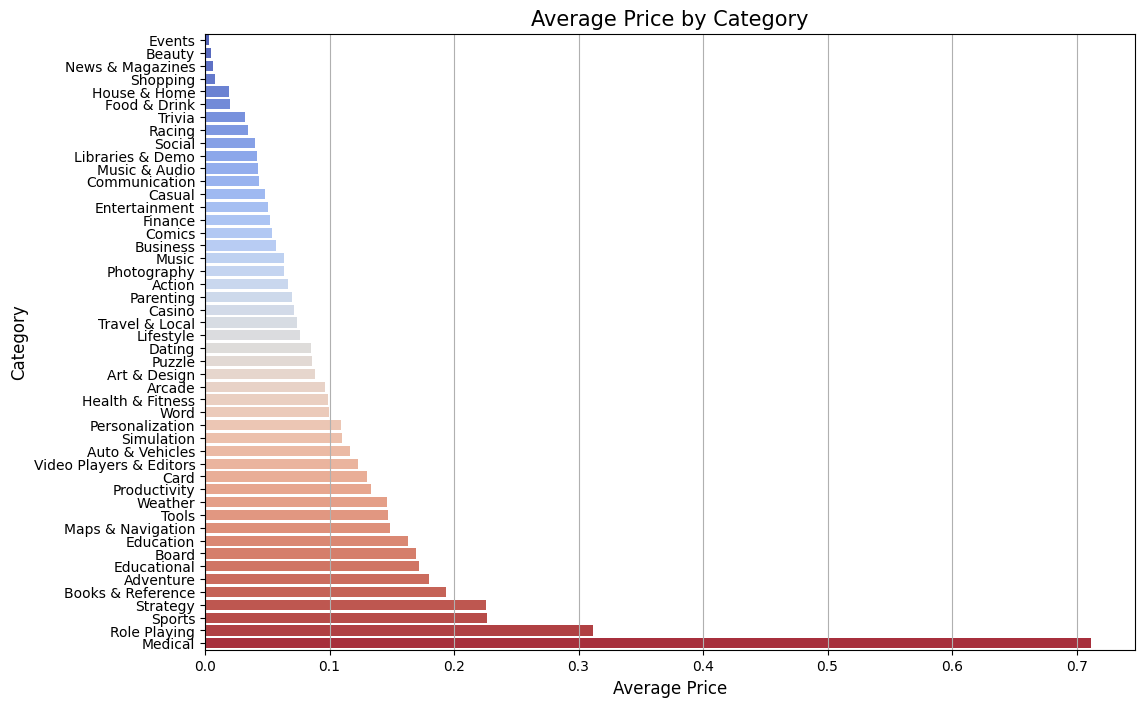

<ipython-input-56-cb7d5d438f39>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='App Name', x='Rating Count', data=top_rated_apps, palette='viridis')


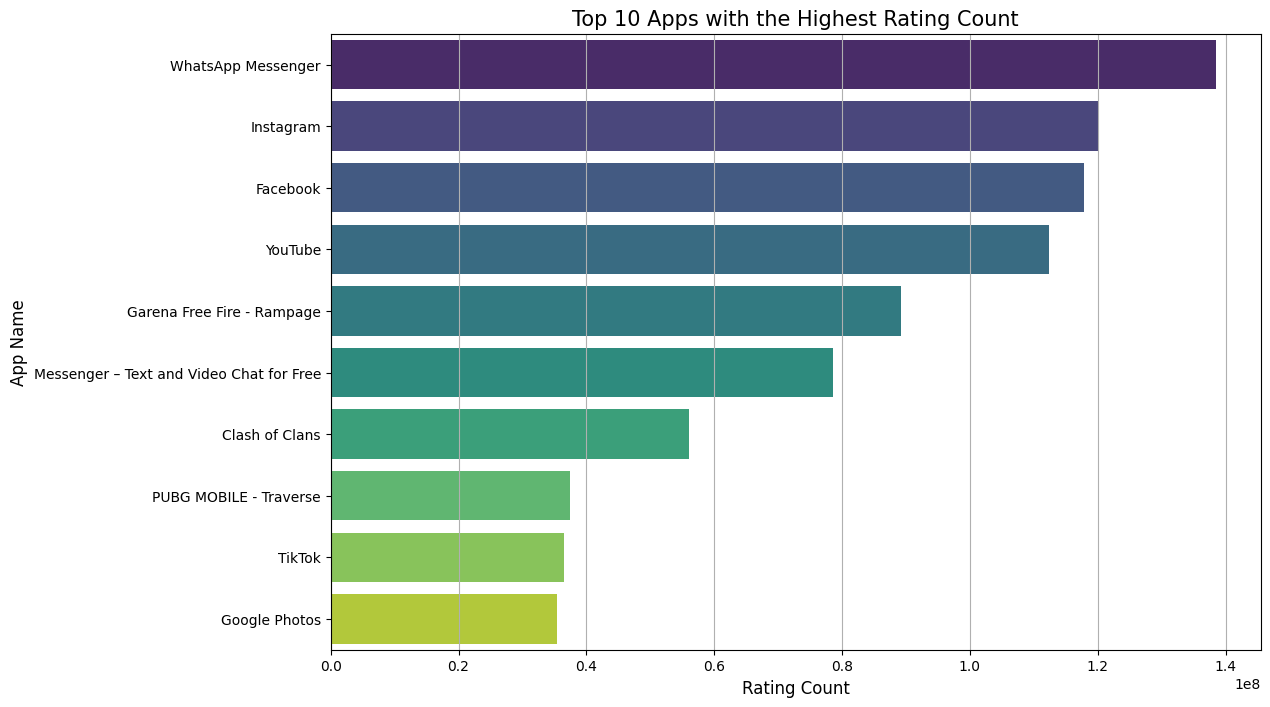

In [ ]:
# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_cols = all_parts_pd.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

# 8. Average Price by Category
plt.figure(figsize=(12, 8))
avg_price = all_parts_pd.groupby('Category')['Price'].mean().sort_values()
sns.barplot(y=avg_price.index, x=avg_price.values, palette='coolwarm')
plt.title('Average Price by Category', fontsize=15)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(True, axis='x')
plt.show()

# 9. Top 10 Apps with the Highest Rating Count
top_rated_apps = all_parts_pd.nlargest(10, 'Rating Count')[['App Name', 'Rating Count']]
plt.figure(figsize=(12, 8))
sns.barplot(y='App Name', x='Rating Count', data=top_rated_apps, palette='viridis')
plt.title('Top 10 Apps with the Highest Rating Count', fontsize=15)
plt.xlabel('Rating Count', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.grid(True, axis='x')
plt.show()

<ipython-input-57-234d3289964d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='App Name', x='Price', data=top_priced_apps, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) mis

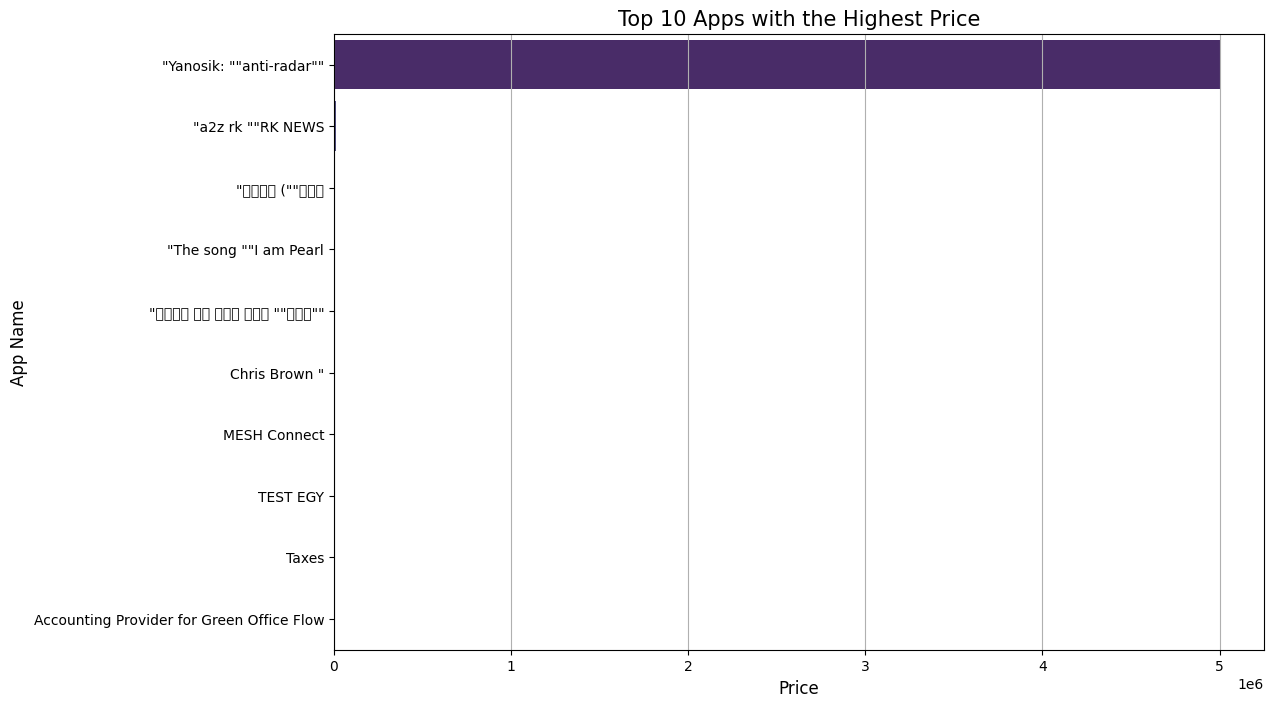

                                          App Name       Price
2177277                   "Yanosik: ""anti-radar""  5000000.00
629107                           "a2z rk ""RK NEWS    10159.00
509310                                "인생수업 (""좋은글     4106.00
2214144                     "The song ""I am Pearl     3725.00
951645                    "반려동물 앱이 하나로 통합된 ""냥아지""     2108.00
329293                               Chris Brown "      864.00
544468                                MESH Connect      400.00
20127                                     TEST EGY      399.99
268776                                       Taxes      399.99
284676   Accounting Provider for Green Office Flow      399.99


In [ ]:
# Top 10 Apps with the Highest Price
top_priced_apps = all_parts_pd.nlargest(10, 'Price')[['App Name', 'Price']]
plt.figure(figsize=(12, 8))
sns.barplot(y='App Name', x='Price', data=top_priced_apps, palette='viridis')
plt.title('Top 10 Apps with the Highest Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.grid(True, axis='x')
plt.show()

# Display the DataFrame for verification
print(top_priced_apps)

